In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('virginia-history.csv', index_col=0)
num_cases = np.flip(data.iloc[0:180]['hospitalizedCurrently'].to_numpy())
time_index = np.linspace(0,180,180)
num_days = len(time_index)

Text(0, 0.5, 'Num cases')

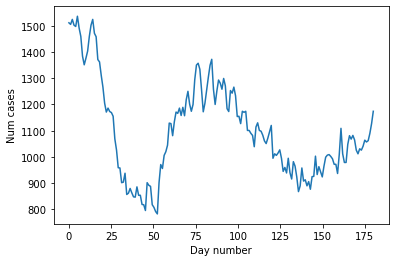

In [12]:
plt.plot(time_index, num_cases)
plt.xlabel('Day number')
plt.ylabel('Num cases')

In [13]:
plt.plot(time_index, num_cases_smooth)
plt.xlabel('Day number')
plt.ylabel('Num cases (smooth)')

NameError: name 'num_cases_smooth' is not defined

In [ ]:
from scipy.interpolate import UnivariateSpline

In [ ]:
interpolan = UnivariateSpline(time_index, num_cases_smooth, k=2, s=0)

In [ ]:
point = 4
error_at_one_point = abs(num_cases_smooth[point] - interpolan(point))

In [ ]:
error_at_one_point

In [ ]:
interpolationPoints = np.zeros(len(num_cases_smooth))
for i in range(len(num_cases_smooth)):
    interpolationPoints[i] = interpolan(i)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(time_index, interpolationPoints, 'r', label = 'Interpolated')
plt.plot(time_index, num_cases_smooth, 'b',label = 'Smooth Data')
plt.plot(time_index, num_cases, 'g',label = 'Original Data')
plt.xlabel('Day Number')
plt.ylabel('Num Cases')
plt.legend()

In [ ]:
#the interpolation follows the smooth data very well
#the interpolation also follows the original data well but does not follow the peaks and troughs of it

In [ ]:
error_all_days = np.zeros(len(num_cases))
for i in range(len(num_cases)):
    error_all_days[i] = abs(interpolationPoints[i] - num_cases[i])

In [ ]:
error_all_days